In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import re
import random

### Load the bad videos

In [2]:
%store -r bad_videos avg_videos good_videos

In [3]:
OPENFACE_DIR = 'openFace/processed/'
MEDIAPIPE_DIR = 'mediaPipe/processed/'

#video = bad_videos[random.randint(0, len(bad_videos))]
#video = avg_videos[random.randint(0, len(bad_videos))]
#video = good_videos[random.randint(0, len(bad_videos))]
videos = ['battlefield1_50','david_bowie_109','david_bowie_13','david_bowie_36','eminem_142','fatality_15','fatality_17','fatality_9','gta1_1','gta1_34','gta2_2','gta2_26','happy_wheels_97','play_lastofus_202','qwop_40','qwop_93']
video = videos[-1]
print(f'Choosen video: {video}')

Choosen video: qwop_93


## Nose landmarks

Nose landmarks of qwop_93.mp4


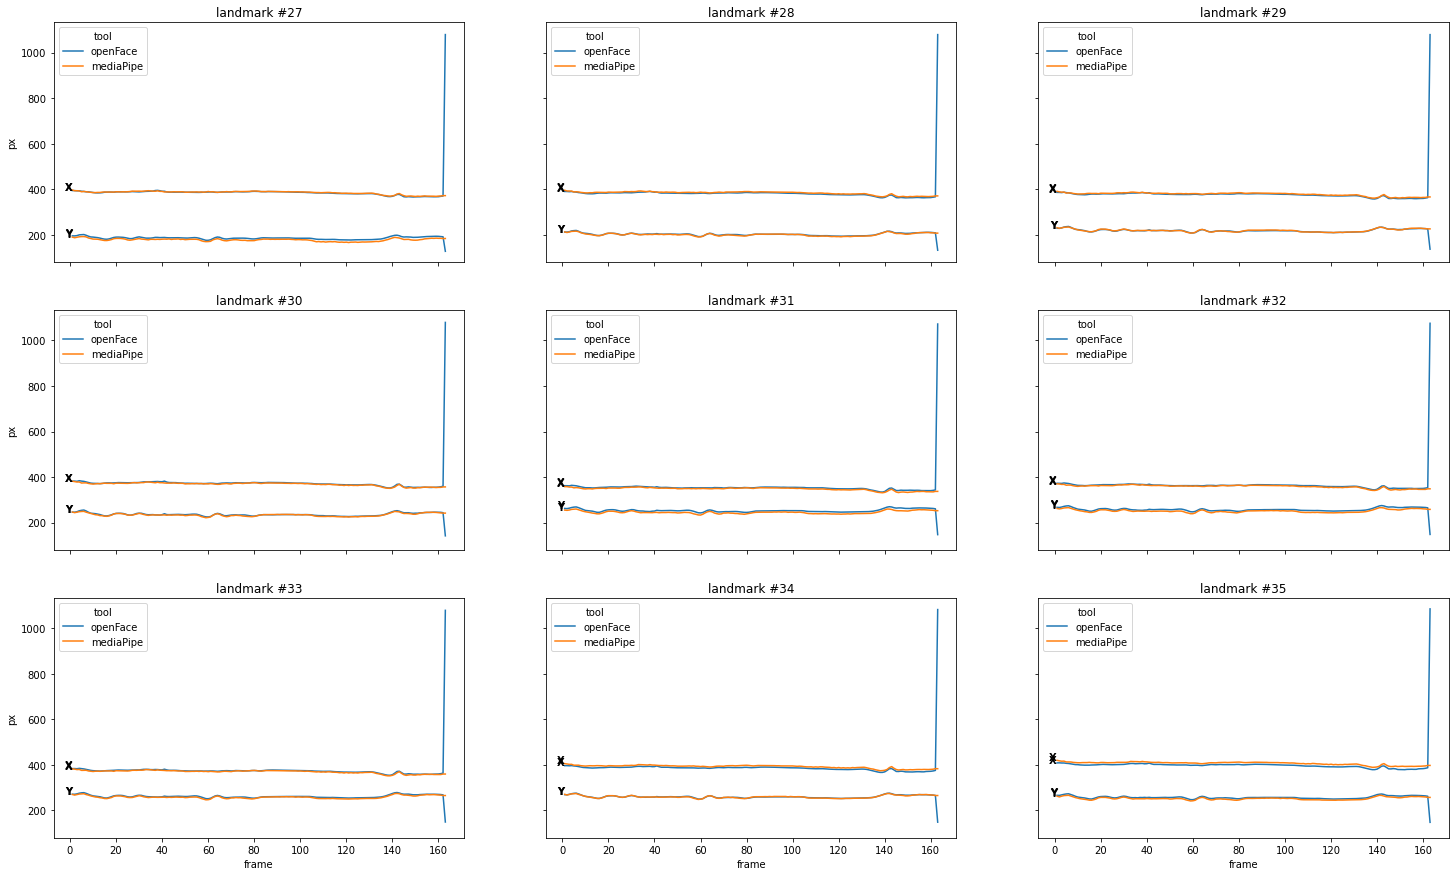

In [4]:
print(f'Nose landmarks of {video}.mp4')

face_mesh = pd.read_csv('mediaPipe/faceMesh/face_mesh.csv')

openFace_nose_lndmks = [i for i in range(27, 36)]

fig, axes = plt.subplots(3, 3, figsize=(25, 15), sharex=True, sharey=True)
axes = axes.flatten()

for i, landmark in enumerate(openFace_nose_lndmks):

    mask = (face_mesh['openFace_landmark'] == landmark)

    mediaPipe_landmarks_X = ['x_'+str(ID) for ID in face_mesh[mask].id]
    mediaPipe_landmarks_Y = ['y_'+str(ID) for ID in face_mesh[mask].id]

    of_df = pd.read_csv(OPENFACE_DIR + video + '_openface.csv')
    of_df = of_df[['frame', f'x_{landmark}', f'y_{landmark}']]
    of_df['tool'] = ['openFace' for _ in range(len(of_df.index))]


    mp_df = pd.read_csv(MEDIAPIPE_DIR + video + '_mediapipe.csv')
    mp_df = pd.DataFrame({'frame': mp_df['frame'], f'x_{landmark}':mp_df[mediaPipe_landmarks_X].mean(axis=1), f'y_{landmark}':mp_df[mediaPipe_landmarks_Y].mean(axis=1)})
    mp_df['tool'] = ['mediaPipe' for _ in range(len(mp_df.index))]

    df = pd.concat([of_df, mp_df], ignore_index=True)

    sns.lineplot(x='frame', y=f'x_{landmark}', data=df, hue='tool', ax=axes[i]).set(ylabel='px', title=f'landmark #{landmark}')
    sns.lineplot(x='frame', y=f'y_{landmark}', data=df, hue='tool', legend=False, dashes=True, ax=axes[i])

    axes[i].text(of_df['frame'][0], of_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(of_df['frame'][0], of_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')
    
    axes[i].text(mp_df['frame'][0], mp_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(mp_df['frame'][0], mp_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.show()

## Mouth landmarks

Mouth landmarks of qwop_93.mp4


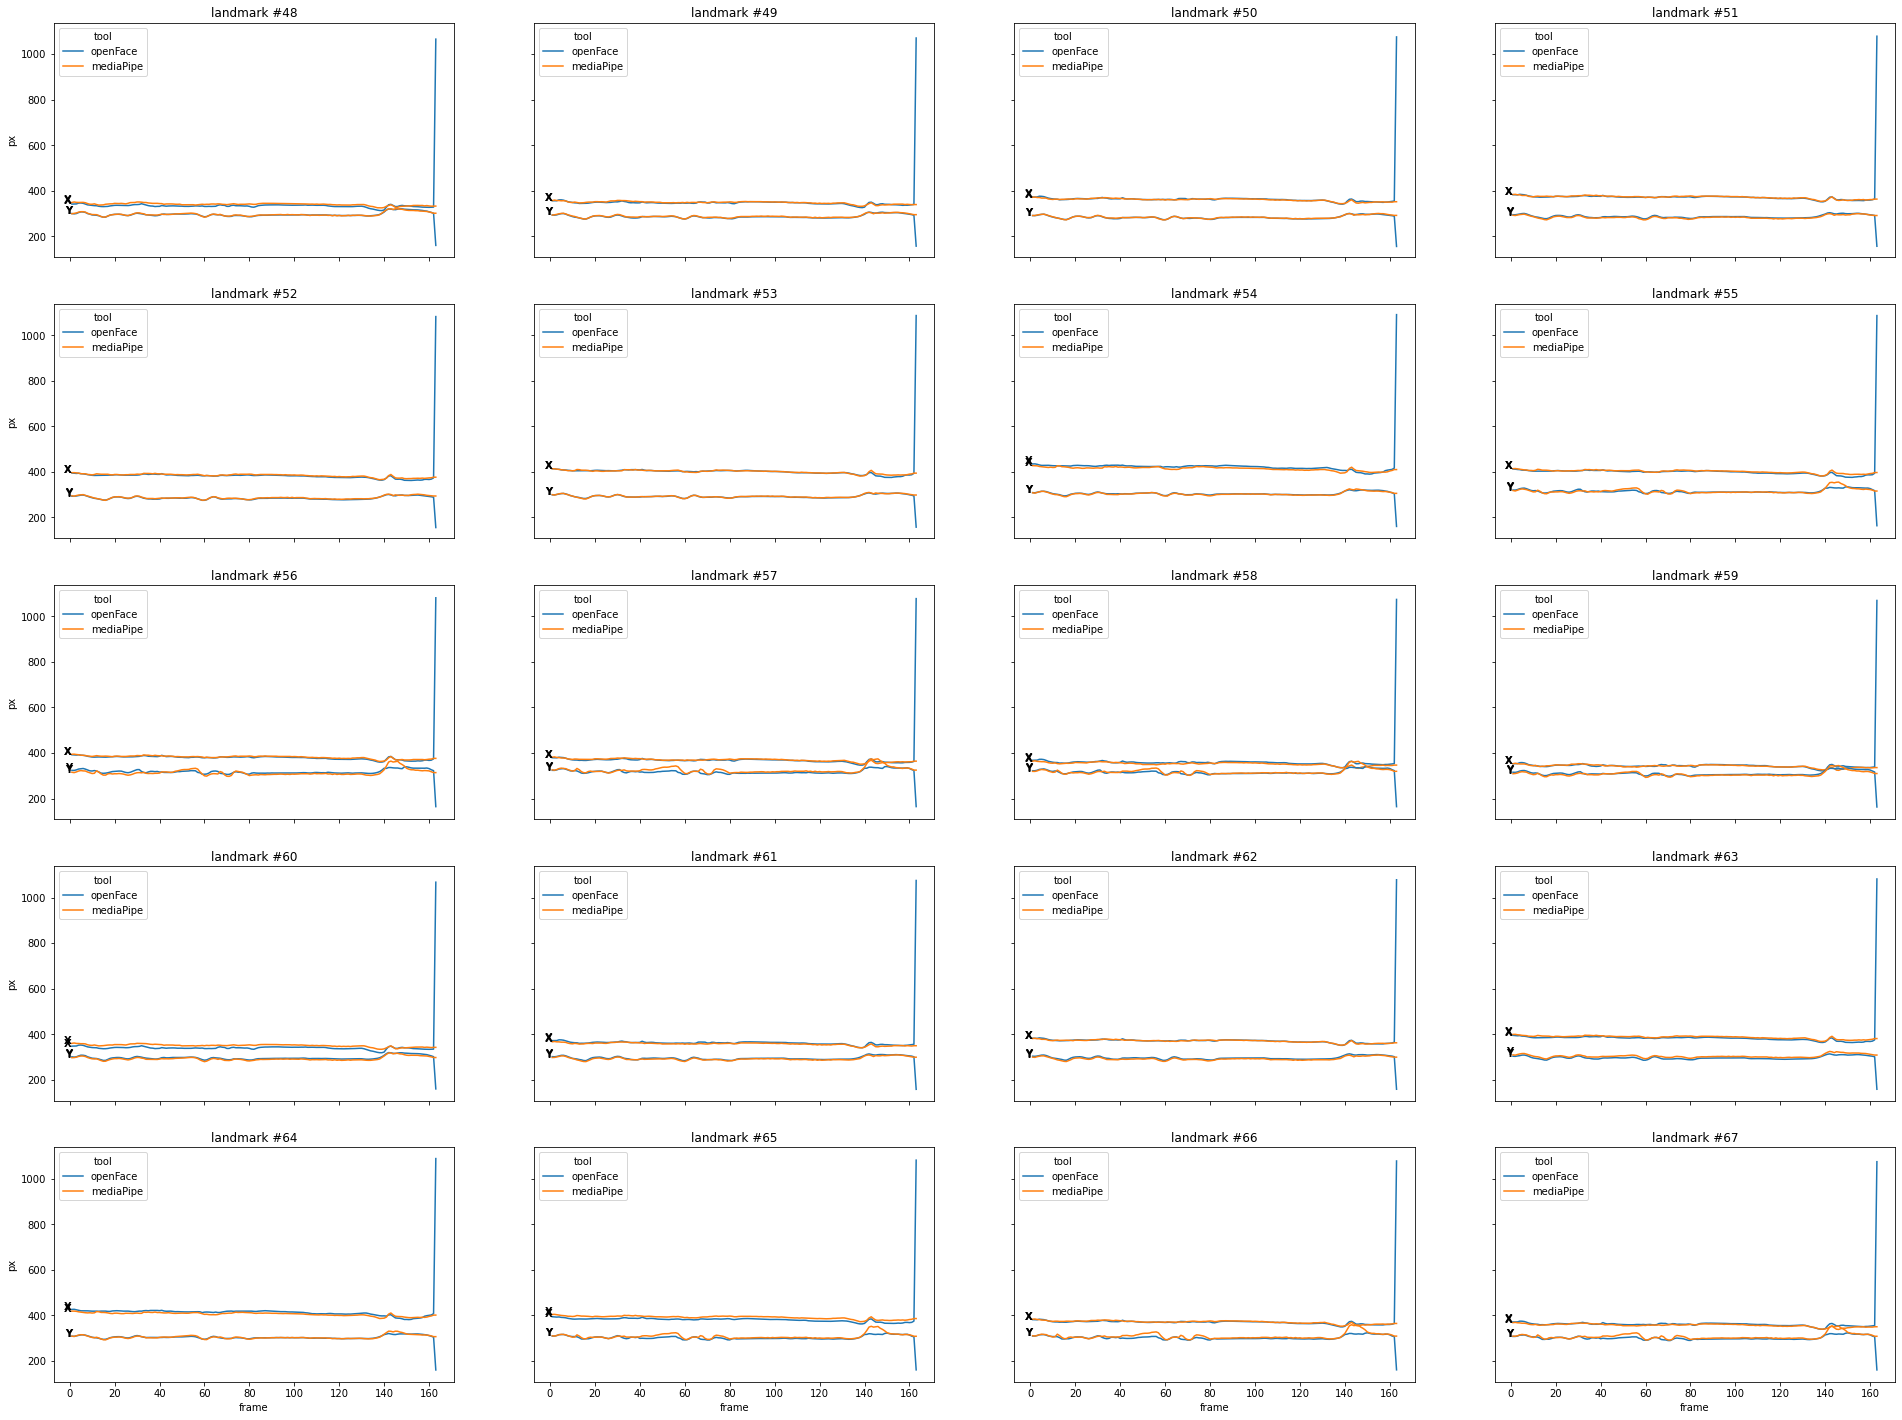

In [5]:
print(f'Mouth landmarks of {video}.mp4')

face_mesh = pd.read_csv('mediaPipe/faceMesh/face_mesh.csv')

openFace_mouth_lndmks = [i for i in range(48, 68)]

fig, axes = plt.subplots(5, 4, figsize=(33, 25), sharex=True, sharey=True)
axes = axes.flatten()

for i, landmark in enumerate(openFace_mouth_lndmks):

    mask = (face_mesh['openFace_landmark'] == landmark)

    mediaPipe_landmarks_X = ['x_'+str(ID) for ID in face_mesh[mask].id]
    mediaPipe_landmarks_Y = ['y_'+str(ID) for ID in face_mesh[mask].id]

    of_df = pd.read_csv(OPENFACE_DIR + video + '_openface.csv')
    of_df = of_df[['frame', f'x_{landmark}', f'y_{landmark}']]
    of_df['tool'] = ['openFace' for _ in range(len(of_df.index))]


    mp_df = pd.read_csv(MEDIAPIPE_DIR + video + '_mediapipe.csv')
    mp_df = pd.DataFrame({'frame': mp_df['frame'], f'x_{landmark}':mp_df[mediaPipe_landmarks_X].mean(axis=1), f'y_{landmark}':mp_df[mediaPipe_landmarks_Y].mean(axis=1)})
    mp_df['tool'] = ['mediaPipe' for _ in range(len(mp_df.index))]

    df = pd.concat([of_df, mp_df], ignore_index=True)

    sns.lineplot(x='frame', y=f'x_{landmark}', data=df, hue='tool', ax=axes[i]).set(ylabel='px', title=f'landmark #{landmark}')
    sns.lineplot(x='frame', y=f'y_{landmark}', data=df, hue='tool', legend=False, dashes=True, ax=axes[i])

    axes[i].text(of_df['frame'][0], of_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(of_df['frame'][0], of_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')
    
    axes[i].text(mp_df['frame'][0], mp_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(mp_df['frame'][0], mp_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.show()

## Left eye landamrks

Left eye landmarks of qwop_93.mp4


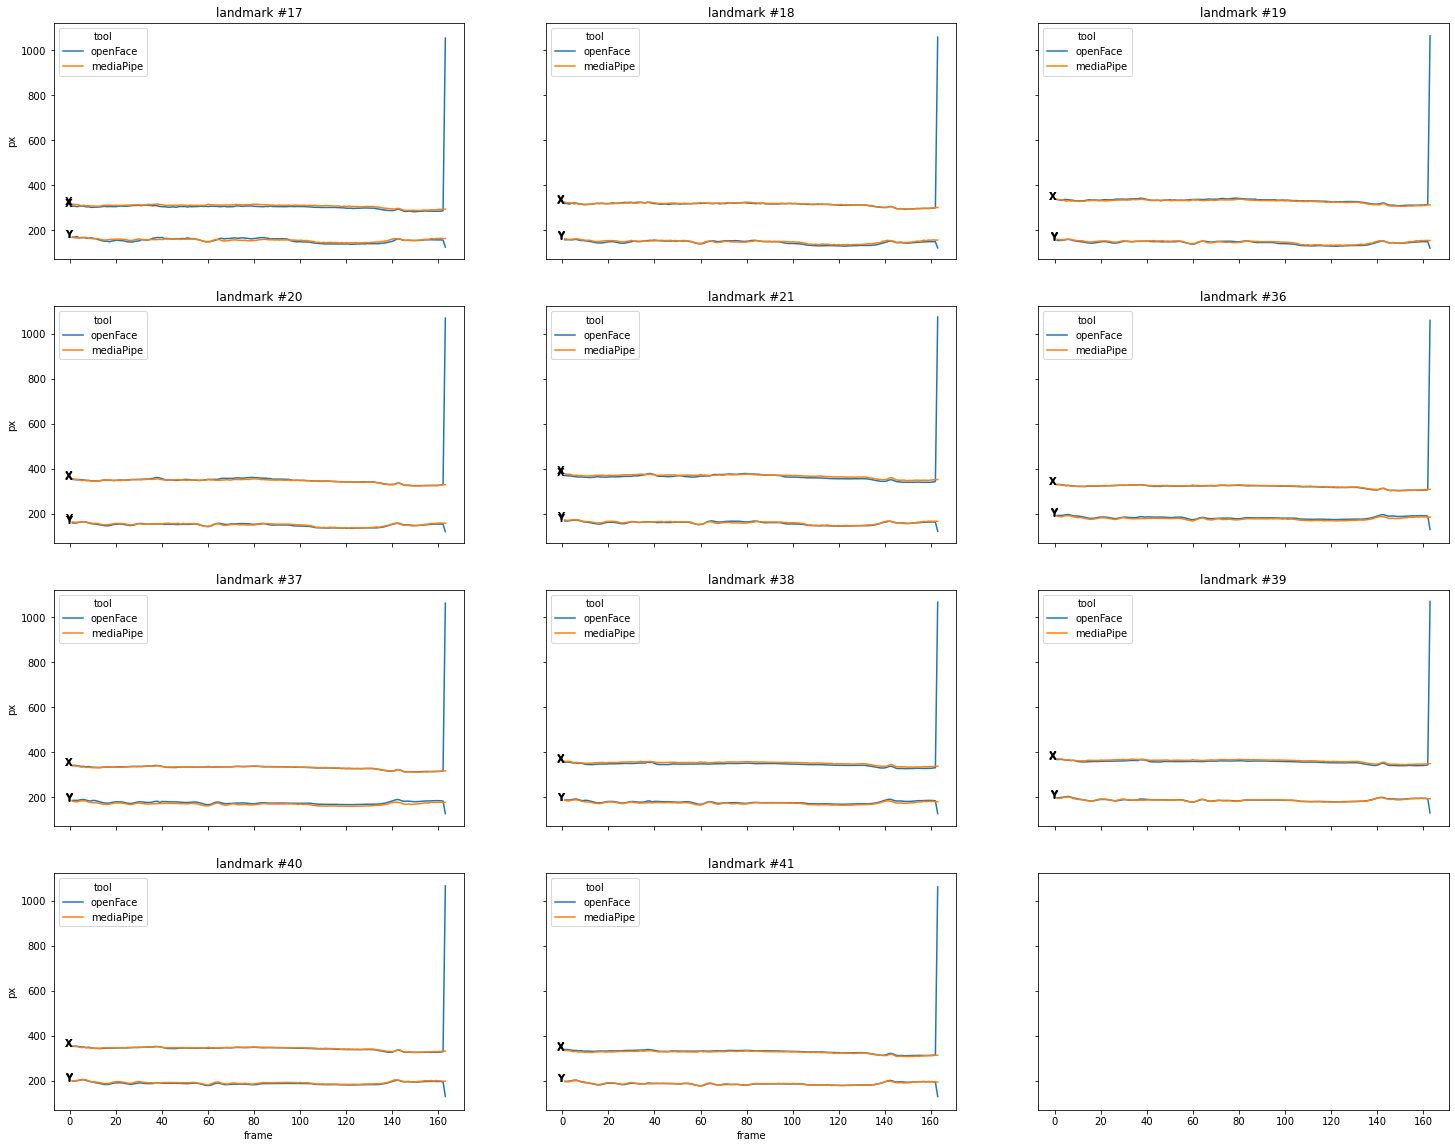

In [6]:
print(f'Left eye landmarks of {video}.mp4')

face_mesh = pd.read_csv('mediaPipe/faceMesh/face_mesh.csv')

openFace_leye_lndmks = [i for i in range(17,22)] + [i for i in range(36, 42)]

fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=True, sharey=True)
axes = axes.flatten()

for i, landmark in enumerate(openFace_leye_lndmks):

    mask = (face_mesh['openFace_landmark'] == landmark)

    mediaPipe_landmarks_X = ['x_'+str(ID) for ID in face_mesh[mask].id]
    mediaPipe_landmarks_Y = ['y_'+str(ID) for ID in face_mesh[mask].id]

    of_df = pd.read_csv(OPENFACE_DIR + video + '_openface.csv')
    of_df = of_df[['frame', f'x_{landmark}', f'y_{landmark}']]
    of_df['tool'] = ['openFace' for _ in range(len(of_df.index))]


    mp_df = pd.read_csv(MEDIAPIPE_DIR + video + '_mediapipe.csv')
    mp_df = pd.DataFrame({'frame': mp_df['frame'], f'x_{landmark}':mp_df[mediaPipe_landmarks_X].mean(axis=1), f'y_{landmark}':mp_df[mediaPipe_landmarks_Y].mean(axis=1)})
    mp_df['tool'] = ['mediaPipe' for _ in range(len(mp_df.index))]

    df = pd.concat([of_df, mp_df], ignore_index=True)

    sns.lineplot(x='frame', y=f'x_{landmark}', data=df, hue='tool', ax=axes[i]).set(ylabel='px', title=f'landmark #{landmark}')
    sns.lineplot(x='frame', y=f'y_{landmark}', data=df, hue='tool', legend=False, dashes=True, ax=axes[i])

    axes[i].text(of_df['frame'][0], of_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(of_df['frame'][0], of_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')
    
    axes[i].text(mp_df['frame'][0], mp_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(mp_df['frame'][0], mp_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.show()

## Right eye landmarks

Right eye landmarks of qwop_93.mp4


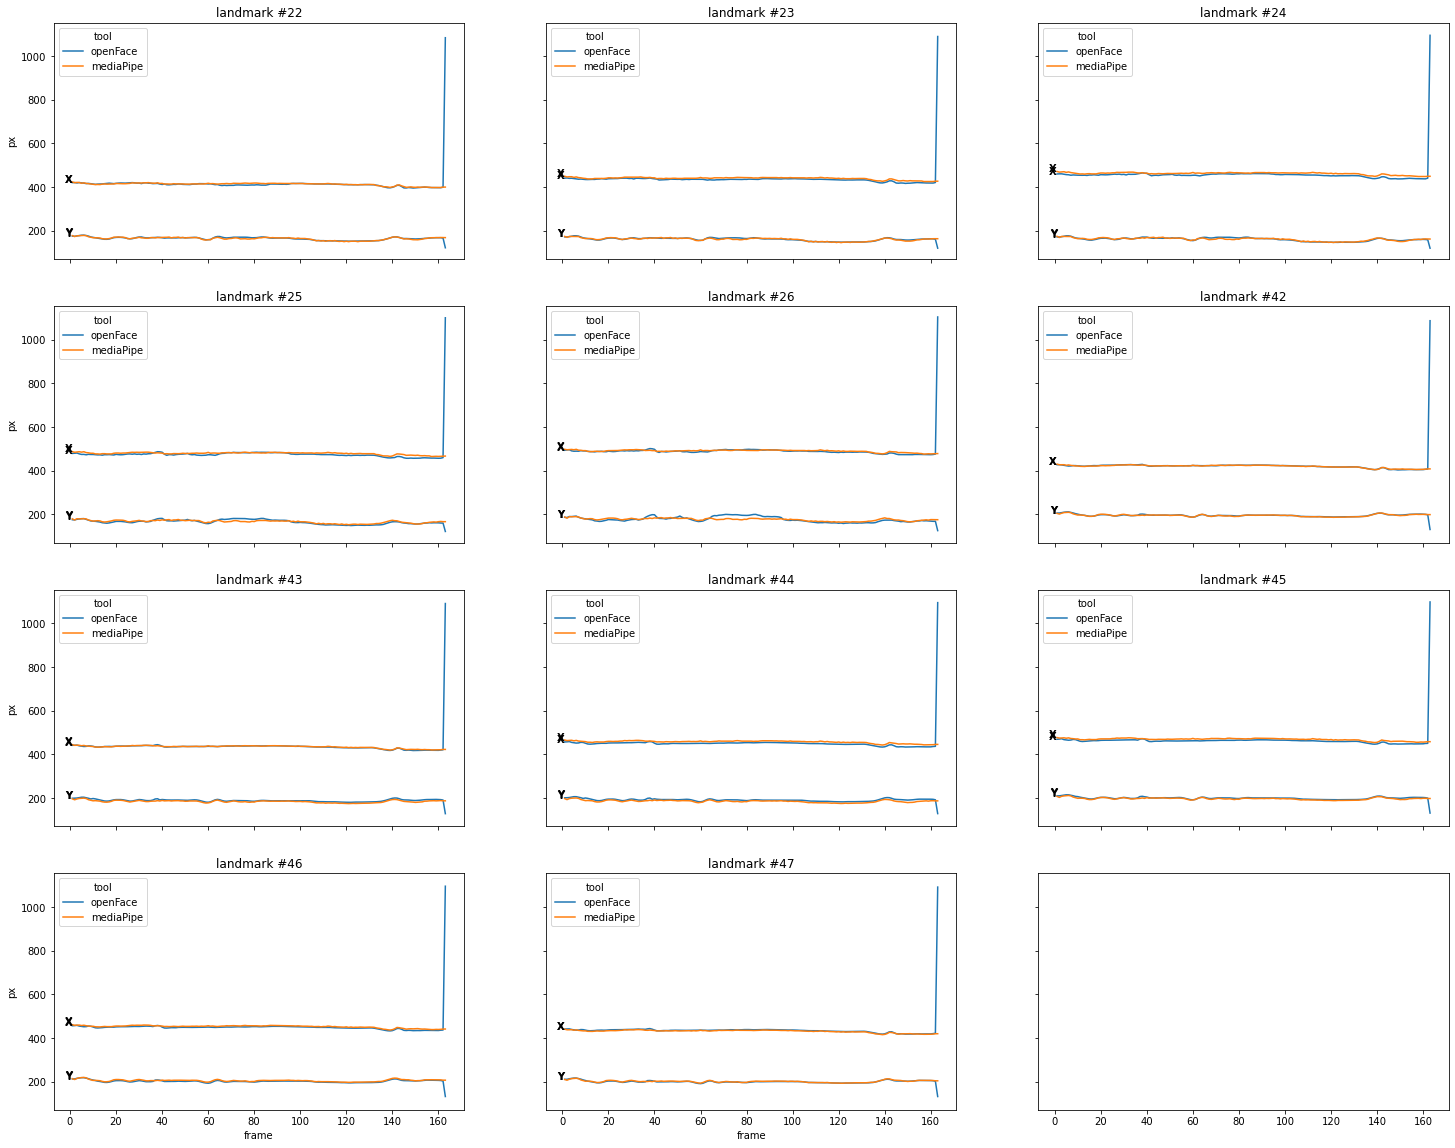

In [7]:
print(f'Right eye landmarks of {video}.mp4')

face_mesh = pd.read_csv('mediaPipe/faceMesh/face_mesh.csv')

openFace_reye_lndmks = [i for i in range(22,27)] + [i for i in range(42, 48)]

fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=True, sharey=True)
axes = axes.flatten()

for i, landmark in enumerate(openFace_reye_lndmks):

    mask = (face_mesh['openFace_landmark'] == landmark)

    mediaPipe_landmarks_X = ['x_'+str(ID) for ID in face_mesh[mask].id]
    mediaPipe_landmarks_Y = ['y_'+str(ID) for ID in face_mesh[mask].id]

    of_df = pd.read_csv(OPENFACE_DIR + video + '_openface.csv')
    of_df = of_df[['frame', f'x_{landmark}', f'y_{landmark}']]
    of_df['tool'] = ['openFace' for _ in range(len(of_df.index))]


    mp_df = pd.read_csv(MEDIAPIPE_DIR + video + '_mediapipe.csv')
    mp_df = pd.DataFrame({'frame': mp_df['frame'], f'x_{landmark}':mp_df[mediaPipe_landmarks_X].mean(axis=1), f'y_{landmark}':mp_df[mediaPipe_landmarks_Y].mean(axis=1)})
    mp_df['tool'] = ['mediaPipe' for _ in range(len(mp_df.index))]

    df = pd.concat([of_df, mp_df], ignore_index=True)

    sns.lineplot(x='frame', y=f'x_{landmark}', data=df, hue='tool', ax=axes[i]).set(ylabel='px', title=f'landmark #{landmark}')
    sns.lineplot(x='frame', y=f'y_{landmark}', data=df, hue='tool', legend=False, dashes=True, ax=axes[i])

    axes[i].text(of_df['frame'][0], of_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(of_df['frame'][0], of_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')
    
    axes[i].text(mp_df['frame'][0], mp_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(mp_df['frame'][0], mp_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.show()

## Outline landmarks

Outline landmarks of qwop_93.mp4


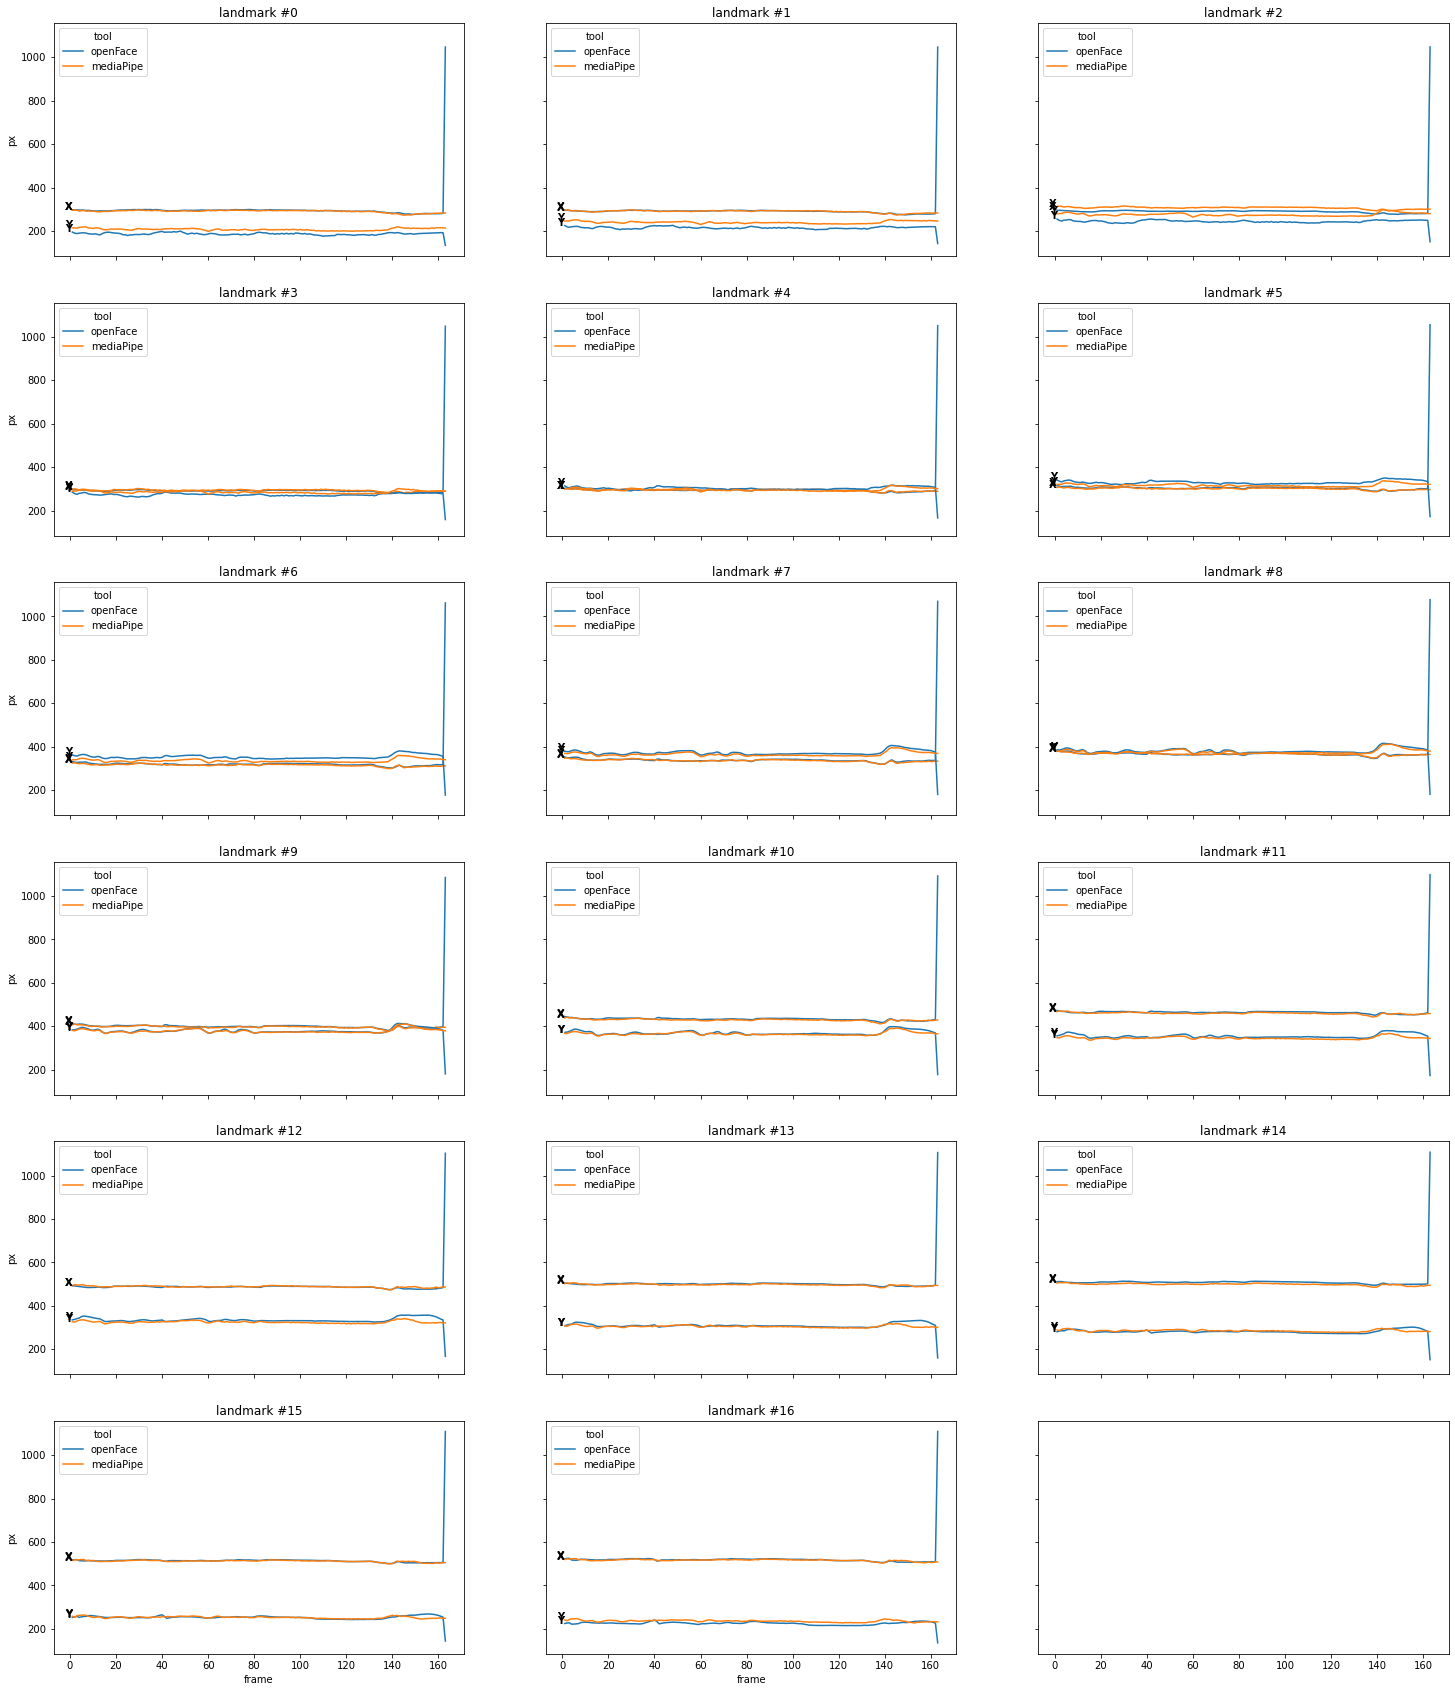

In [8]:
print(f'Outline landmarks of {video}.mp4')

face_mesh = pd.read_csv('mediaPipe/faceMesh/face_mesh.csv')

openFace_outline_lndmks = [i for i in range(0,17)]

fig, axes = plt.subplots(6, 3, figsize=(25, 30), sharex=True, sharey=True)
axes = axes.flatten()

for i, landmark in enumerate(openFace_outline_lndmks):

    mask = (face_mesh['openFace_landmark'] == landmark)

    mediaPipe_landmarks_X = ['x_'+str(ID) for ID in face_mesh[mask].id]
    mediaPipe_landmarks_Y = ['y_'+str(ID) for ID in face_mesh[mask].id]

    of_df = pd.read_csv(OPENFACE_DIR + video + '_openface.csv')
    of_df = of_df[['frame', f'x_{landmark}', f'y_{landmark}']]
    of_df['tool'] = ['openFace' for _ in range(len(of_df.index))]


    mp_df = pd.read_csv(MEDIAPIPE_DIR + video + '_mediapipe.csv')
    mp_df = pd.DataFrame({'frame': mp_df['frame'], f'x_{landmark}':mp_df[mediaPipe_landmarks_X].mean(axis=1), f'y_{landmark}':mp_df[mediaPipe_landmarks_Y].mean(axis=1)})
    mp_df['tool'] = ['mediaPipe' for _ in range(len(mp_df.index))]

    df = pd.concat([of_df, mp_df], ignore_index=True)

    sns.lineplot(x='frame', y=f'x_{landmark}', data=df, hue='tool', ax=axes[i]).set(ylabel='px', title=f'landmark #{landmark}')
    sns.lineplot(x='frame', y=f'y_{landmark}', data=df, hue='tool', legend=False, dashes=True, ax=axes[i])

    axes[i].text(of_df['frame'][0], of_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(of_df['frame'][0], of_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')
    
    axes[i].text(mp_df['frame'][0], mp_df[f'x_{landmark}'][0], "X", horizontalalignment='right', size='medium', color='black', weight='semibold')
    axes[i].text(mp_df['frame'][0], mp_df[f'y_{landmark}'][0], "Y", horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.show()